In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 4000
pd.options.display.max_columns= 60
df = pd.read_csv('./loan.csv')
import warnings
warnings.filterwarnings("ignore")
low_memory=False

C:\Users\suraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
precentage_na=df.isna().sum()*100/df.shape[0]
precentage_na.sort_values(ascending=False)

total_il_high_credit_limit        100.000000
mo_sin_old_rev_tl_op              100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6m                       100.000000
tot_cur_bal                       100.000000
tot_coll_a

In [4]:
df_clean= df.loc[:,precentage_na<=30]
(df_clean.isna().sum()*100/df_clean.shape[0]).sort_values(ascending=False)

emp_title                     6.191303
emp_length                    2.706650
pub_rec_bankruptcies          1.754916
last_pymnt_d                  0.178765
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
revol_util                    0.125891
tax_liens                     0.098195
title                         0.027696
last_credit_pull_d            0.005036
annual_inc                    0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
loan_status                   0.000000
issue_d                       0.000000
verification_status           0.000000
sub_grade                     0.000000
home_ownership                0.000000
addr_state                    0.000000
grade                         0.000000
installment                   0.000000
int_rate                      0.000000
term                          0.000000
funded_amnt_inv               0.000000
funded_amnt              

In [5]:
df_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
df_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
# Convert earliest_cr_line and issue_d to date time format from string format
df_clean['earliest_cr_line']= df_clean['earliest_cr_line'].apply(lambda x: pd.datetime.strptime(str(x), '%b-%y').strftime('%m-%Y'))
df_clean['earliest_cr_line'] = pd.to_datetime(df_clean['earliest_cr_line'])
df_clean['issue_d']=df_clean['issue_d'].apply(lambda x: pd.datetime.strptime(x, '%b-%y').strftime('%m-%Y'))
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'])
# create new derived columns from the above data
df_clean['issue_year'] = df_clean['issue_d'].dt.year
df_clean['issue_month'] = df_clean['issue_d'].dt.month
df_clean['earliest_cr_line_year']= df_clean['earliest_cr_line'].dt.year
df_clean[['issue_year','issue_month','earliest_cr_line_year']]

,issue_year,issue_month,earliest_cr_line_year
0,2011,12,1985
1,2011,12,1999
2,2011,12,2001
3,2011,12,1996
4,2011,12,1996
...,...,...,...
39712,2007,7,1990
39713,2007,7,1986
39714,2007,7,1998
39715,2007,7,1988


In [8]:
#below columns have % which should be removed from it. 
df_clean['int_rate'] = df_clean['int_rate'].apply(lambda x: str(x).rstrip('%'))
df_clean['revol_util'] = df_clean['revol_util'].apply(lambda x: str(x).rstrip('%'))


df_clean['term'] = df_clean['term'].apply(lambda x: str(x).rstrip(' months'))

df_clean[['int_rate','revol_util','term']]

,int_rate,revol_util,term
0,10.65,83.70,36
1,15.27,9.40,60
2,15.96,98.50,36
3,13.49,21,36
4,12.69,53.90,60
...,...,...,...
39712,8.07,13.10,36
39713,10.28,26.90,36
39714,8.07,19.40,36
39715,7.43,0.70,36


In [9]:
# data cleaning for employee length
def get_emp_length(emp_length):
    if emp_length is None:
        return None
    emp_length = str(emp_length)
    if '<' in emp_length:
        emp_length = emp_length.split('<')[1]
        emp_length= emp_length.strip()
    if '+' in emp_length:
        emp_length = emp_length.split('+')[0]
        emp_length= emp_length.strip()
    if ' ' in emp_length:
        emp_length = emp_length.split(' ')[0]
        emp_length= emp_length.strip()
    try:
        return int(emp_length)
    except:
        return None

df_clean['emp_length'] = df_clean['emp_length'].apply(get_emp_length)
df_clean['emp_length']

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

In [10]:
df_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year,issue_month,earliest_cr_line_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,1985
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,1999
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,2001
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,1996
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.90,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,1996


In [11]:
df_clean= df_clean.drop(columns=['url','policy_code','acc_now_delinq','delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'])
df_clean.replace('', pd.NA, inplace=True)
df_clean.replace('NaN', pd.NA, inplace=True)
df_clean.dropna(inplace=True)

In [12]:
numeric_col = ["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","annual_inc",
               "dti","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","total_acc",
               "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","recoveries",
               "collection_recovery_fee","last_pymnt_amnt"]
df_clean[numeric_col].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,30000.0,1.00,0,5,3,0,1687,4,0.00,0.00,1008.71,1008.71,456.46,117.08,1.11,119.66
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,49200.0,20.00,0,1,10,0,5598,37,0.00,0.00,12231.89,12231.89,10000.00,0.00,0.00,357.48
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,80000.0,17.94,0,0,15,0,27783,38,524.06,524.06,3513.33,3513.33,2475.94,0.00,0.00,67.79
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,36000.0,11.20,0,3,9,0,7963,12,0.00,0.00,5632.21,5632.21,5000.00,0.00,0.00,161.03
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,47004.0,23.51,0,1,7,0,17726,11,0.00,0.00,10110.84,10110.84,6985.61,0.00,0.00,1313.76


In [13]:
df_clean[numeric_col].isna().sum()*100/df.shape[0]

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
annual_inc                 0.0
dti                        0.0
delinq_2yrs                0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pymnt_amnt            0.0
dtype: float64

In [14]:

#Checks if an object is numeric and converts it if possible.
for col in numeric_col:
    df_clean[col]=df_clean[col].astype(float)

In [15]:
df_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36475 entries, 1 to 39680
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       36475 non-null  float64       
 1   member_id                36475 non-null  float64       
 2   loan_amnt                36475 non-null  float64       
 3   funded_amnt              36475 non-null  float64       
 4   funded_amnt_inv          36475 non-null  float64       
 5   term                     36475 non-null  float64       
 6   int_rate                 36475 non-null  float64       
 7   installment              36475 non-null  float64       
 8   grade                    36475 non-null  object        
 9   sub_grade                36475 non-null  object        
 10  emp_title                36475 non-null  object        
 11  emp_length               36475 non-null  float64       
 12  home_ownership           36475 n

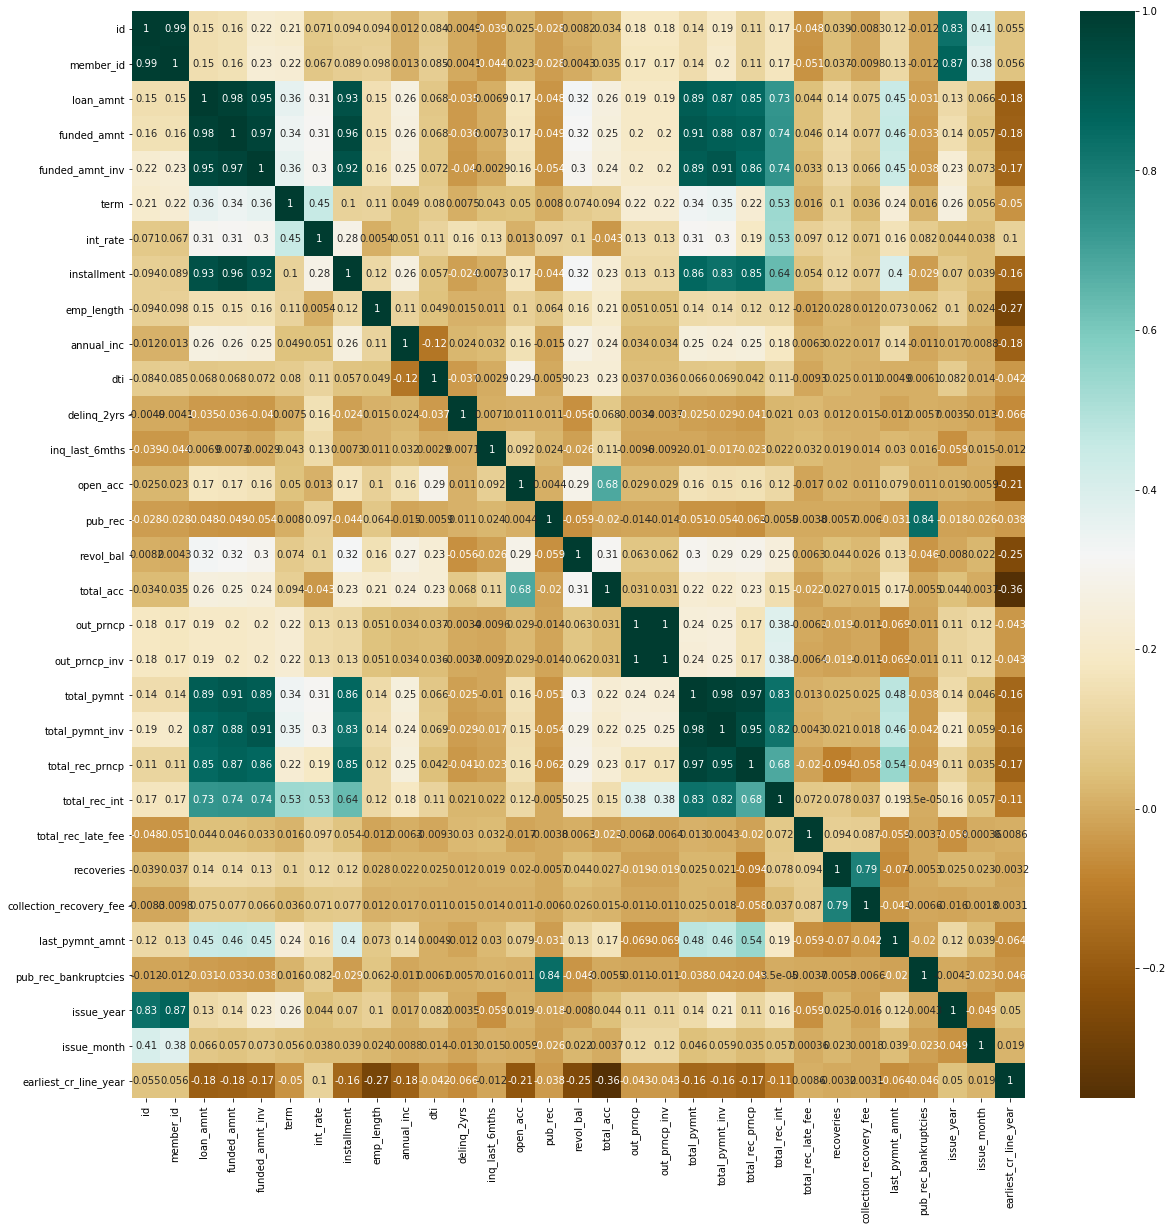

In [16]:
corr = df_clean.corr()
fig = plt.figure(figsize=[20,20])
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,cmap="BrBG")

In [17]:
df_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.40,4.0,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,2011,12,1999
3,1076863.0,1277178.0,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598.0,21,37.0,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0,2011,12,1996
4,1075358.0,1311748.0,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783.0,53.90,38.0,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0,2011,12,1996
5,1075269.0,1311441.0,5000.0,5000.0,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2004-11-01,3.0,9.0,0.0,7963.0,28.30,12.0,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,INDIVIDUAL,0.0,2011,12,2004
6,1069639.0,1304742.0,7000.0,7000.0,7000.0,60.0,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,2005-07-01,1.0,7.0,0.0,17726.0,85.60,11.0,f,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,INDIVIDUAL,0.0,2011,12,2005


In [18]:
#removing the current payment status as it doesnt make any value
df_clean = df_clean[df_clean['loan_status'] != 'Current']
df_clean['loan_status']

1        Charged Off
3         Fully Paid
5         Fully Paid
6         Fully Paid
7         Fully Paid
            ...     
39551     Fully Paid
39562     Fully Paid
39623    Charged Off
39666    Charged Off
39680     Fully Paid
Name: loan_status, Length: 35409, dtype: object

In [19]:
#amount ranges for the loan_amount to further calculate on the defaulters
def amount_range(loan_amount):
    try:
        if loan_amount <= 10000:
            return "low"
        elif loan_amount <= 20000:
            return "medium"
        elif loan_amount <= 30000:
            return "high"
        else:
            return "very_high"
    except:
        print(loan_amount)
        return "low"

df_clean['amount_range'] = df_clean['loan_amnt'].apply(amount_range)

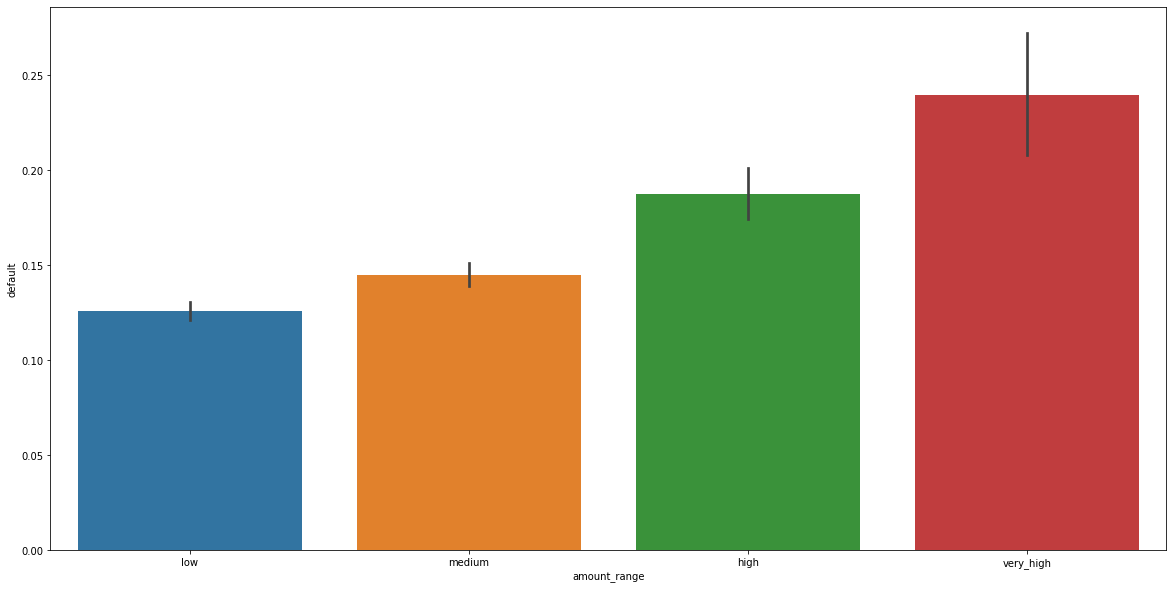

In [20]:
# new column default, 1 if defaulted 0 if fully paid
df_clean["default"] = df_clean['loan_status'].apply(lambda x : 0 if x == "Fully Paid" else 1)
# graph with loan_amount_category with default
plt.figure(figsize=(20,10))
sns.barplot(x='amount_range', y='default', data=df_clean)
plt.show()

In [21]:
#as per the above plot loan with very high amount has more chances of default. lets look at the values here
(df_clean.groupby("amount_range")['default'].sum().sort_values()/ df_clean.groupby("amount_range")['default'].count()).sort_values()

amount_range
low          0.126020
medium       0.145090
high         0.187730
very_high    0.239521
Name: default, dtype: float64

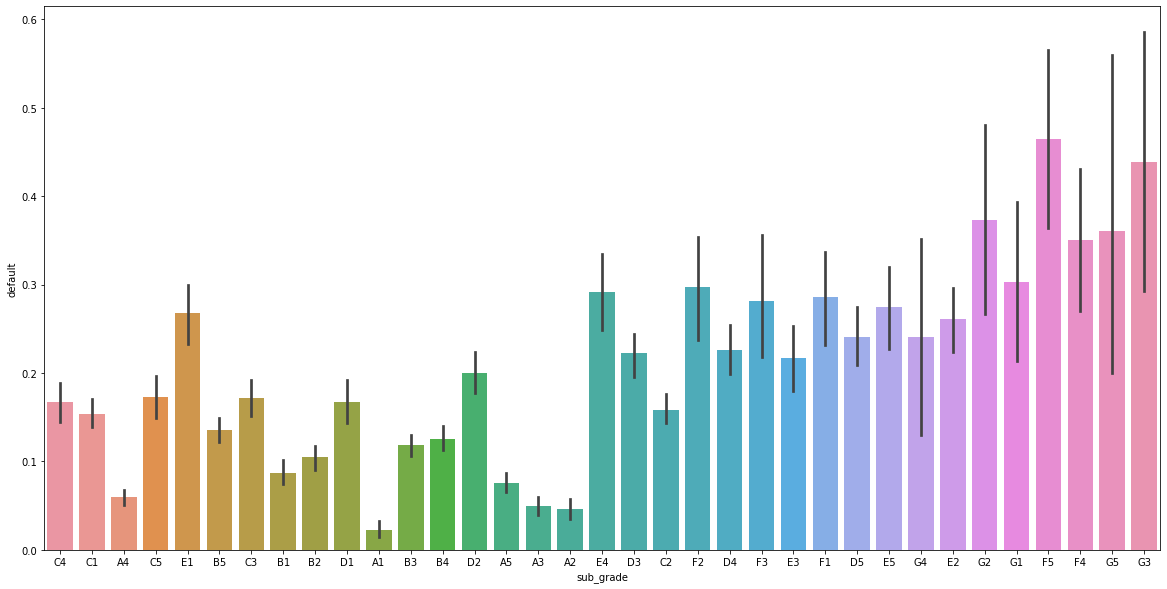

In [22]:
# graph of sub_grade/default count. Since subgrade is subset of the grade
plt.figure(figsize=(20,10))
sns.barplot(x='sub_grade', y='default', data=df_clean)
plt.show() 

In [23]:
# A1 has least chance of default and F5 with high chance of default. Lets look at the values for each sub_grade sorted
(df_clean.groupby(['sub_grade'])['default'].sum() / df_clean.groupby(['sub_grade'])['default'].count()).sort_values()

sub_grade
A1    0.022886
A2    0.046460
A3    0.049080
A4    0.059354
A5    0.075995
B1    0.087415
B2    0.104658
B3    0.118579
B4    0.125890
B5    0.135434
C1    0.153600
C2    0.158217
D1    0.166863
C4    0.166971
C3    0.172137
C5    0.172512
D2    0.199663
E3    0.216495
D3    0.222222
D4    0.225882
D5    0.240523
G4    0.240741
E2    0.261023
E1    0.267728
E5    0.274788
F3    0.281250
F1    0.285714
E4    0.291878
F2    0.297674
G1    0.303371
F4    0.350365
G5    0.360000
G2    0.373333
G3    0.439024
F5    0.464646
Name: default, dtype: float64

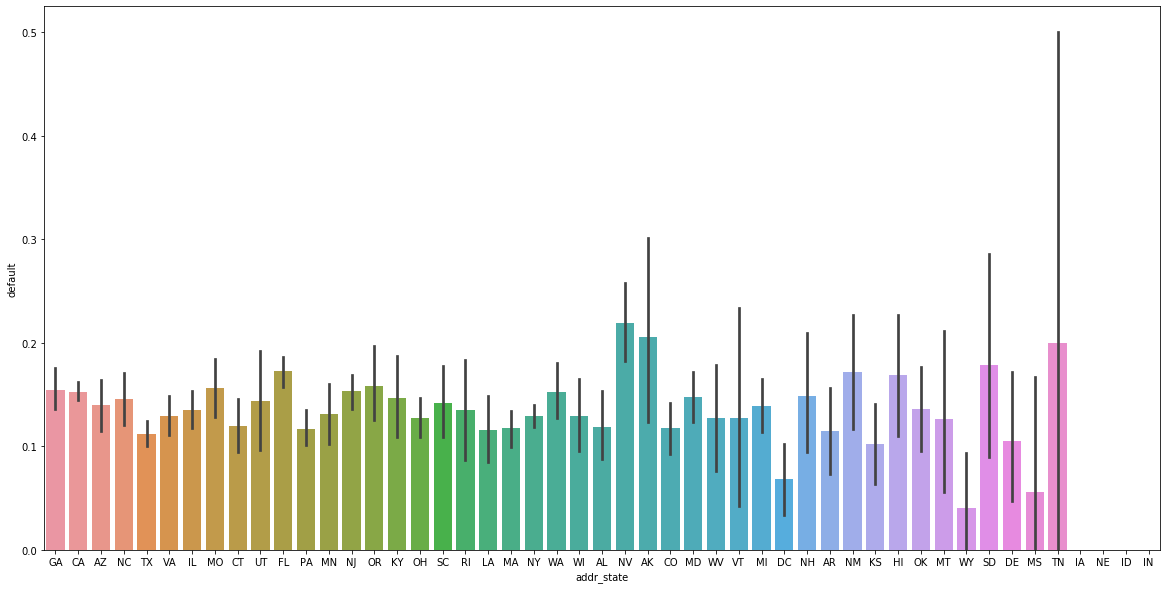

In [24]:

# graph of addr_state/default count.
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='default', data=df_clean)
plt.show()

In [25]:
# wy has least chance of default and ne with highest chance of default. Lets look at the values for each addr_state sorted
(df_clean.groupby(['addr_state'])['default'].sum() / df_clean.groupby(['addr_state'])['default'].count()).sort_values()

addr_state
NE    0.000000
IN    0.000000
ID    0.000000
IA    0.000000
WY    0.040000
MS    0.055556
DC    0.068293
KS    0.102564
DE    0.104762
TX    0.111925
AR    0.115207
LA    0.115681
PA    0.116921
CO    0.117302
MA    0.117597
AL    0.118388
CT    0.119266
MT    0.126761
WV    0.127389
OH    0.127389
VT    0.127660
WI    0.128866
VA    0.129262
NY    0.129318
MN    0.131295
RI    0.135135
IL    0.135311
OK    0.136029
MI    0.138846
AZ    0.139474
SC    0.142180
UT    0.144105
NC    0.145617
KY    0.146758
MD    0.148109
NH    0.148649
CA    0.152609
WA    0.152778
NJ    0.153110
GA    0.154828
MO    0.155993
OR    0.158690
HI    0.168831
NM    0.171779
FL    0.172713
SD    0.178571
TN    0.200000
AK    0.205479
NV    0.218962
Name: default, dtype: float64

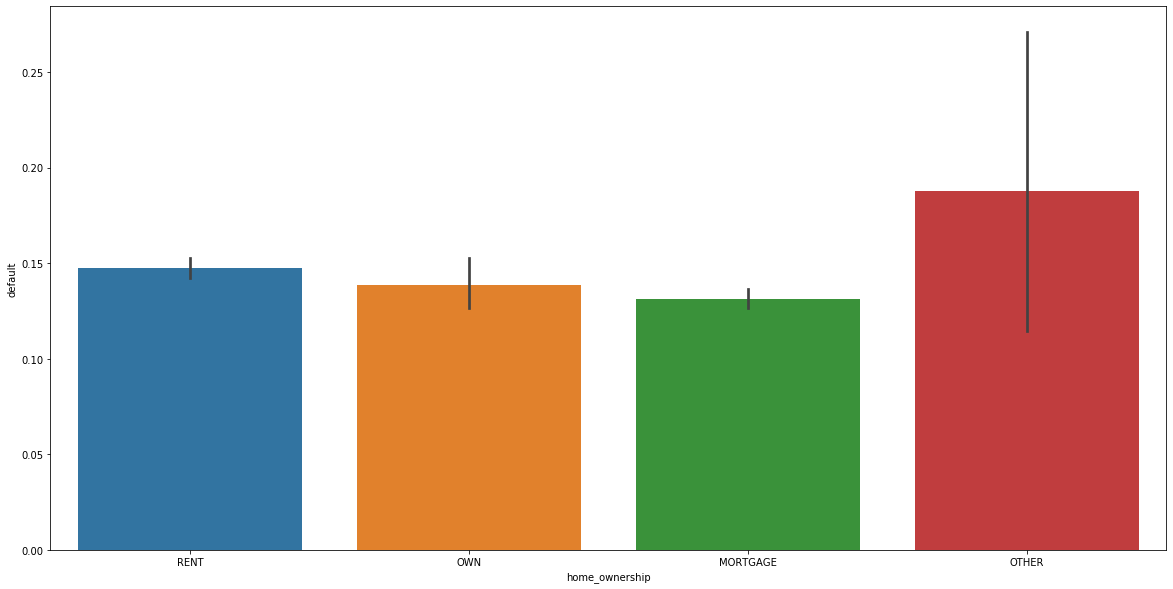

In [26]:

# graph of home_ownership/default count.
plt.figure(figsize=(20,10))
sns.barplot(x='home_ownership', y='default', data=df_clean)
plt.show() 

In [27]:
# borrower who mention home ownership as other has chance of default. Lets look at the values for each home_ownership sorted
(df_clean.groupby(['home_ownership'])['default'].sum() / df_clean.groupby(['home_ownership'])['default'].count()).sort_values()

home_ownership
MORTGAGE    0.131373
OWN         0.138645
RENT        0.147671
OTHER       0.187500
Name: default, dtype: float64

In [28]:
#as per the mean, median(50%) above lets consider 10 as low and 15 medium and above 15 be high interest 
def interest_rate(rate):
    if rate <= 10:
        return "low"
    elif rate <= 15:
        return "medium"
    else:
        return "high"

df_clean['interest_rate'] = df_clean['int_rate'].apply(interest_rate)

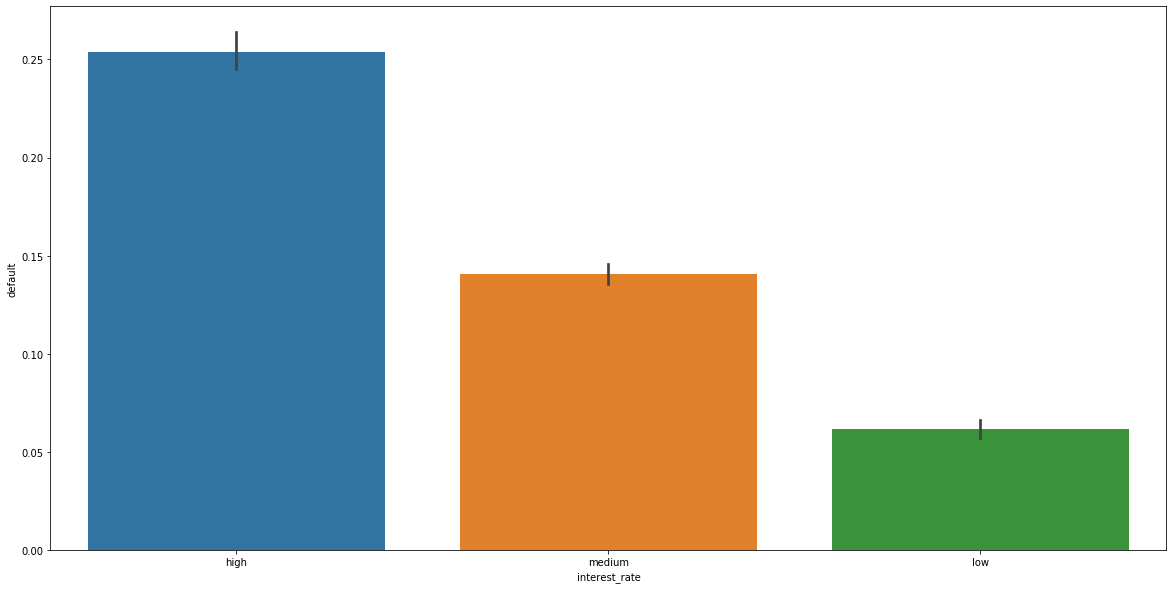

In [29]:
# graph of interest_rate_category vs default count
plt.figure(figsize=(20,10))
sns.barplot(x='interest_rate', y='default', data=df_clean)
plt.show()

In [30]:
# as per the plot loans with higher interest rate has higher chance of default. Lets look into the values
df_clean.groupby(['interest_rate'])['default'].sum() / df_clean.groupby(['interest_rate'])['default'].count().sort_values()

interest_rate
high      0.253922
low       0.061616
medium    0.140593
Name: default, dtype: float64

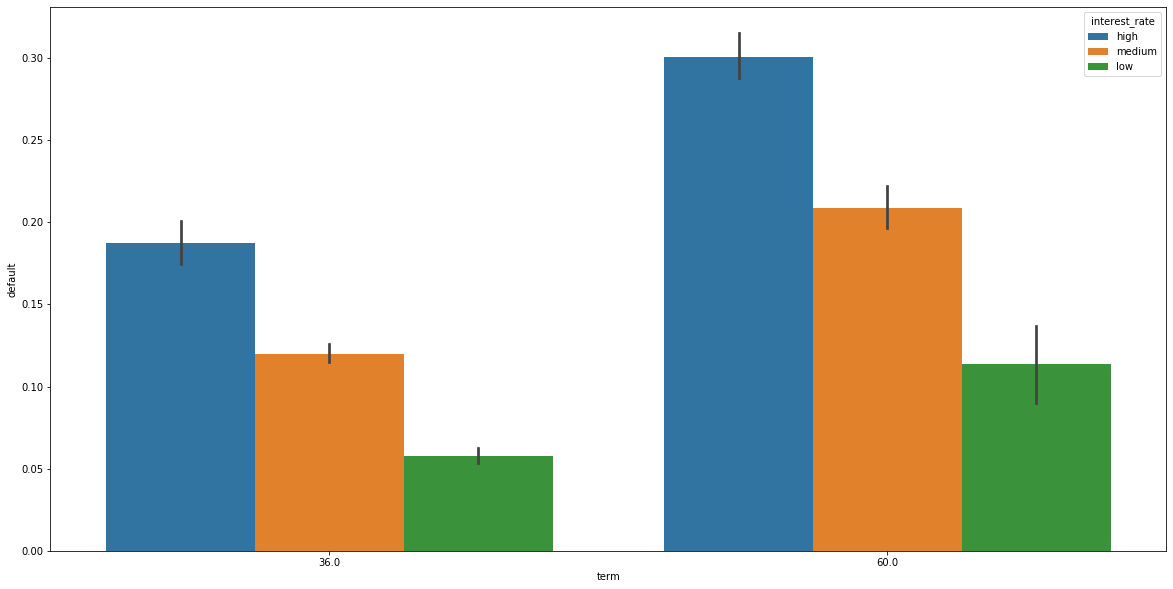

In [31]:
#lets take the interest rate of loans and plot them with term
plt.figure(figsize=[20, 10])
sns.barplot(x='term',hue='interest_rate', y="default", data=df_clean)
plt.show()

As per the plot we see, high interest rate has more chances of default and low interest rate has less chances of default.

In [32]:
#lets look in to the defaults by income category
#as per the mean, median(50%) above lets consider 10 as low and 15 medium and above 15 be high interest 
def annual_inc_in_thousand(income):
    return income/1000;

df_clean['annual_inc_in_thousand'] = df_clean['annual_inc'].apply(annual_inc_in_thousand)

df_clean.annual_inc_in_thousand.describe()

count    35409.000000
mean        69.071041
std         63.975634
min          4.000000
25%         41.356800
50%         60.000000
75%         82.500000
max       6000.000000
Name: annual_inc_in_thousand, dtype: float64

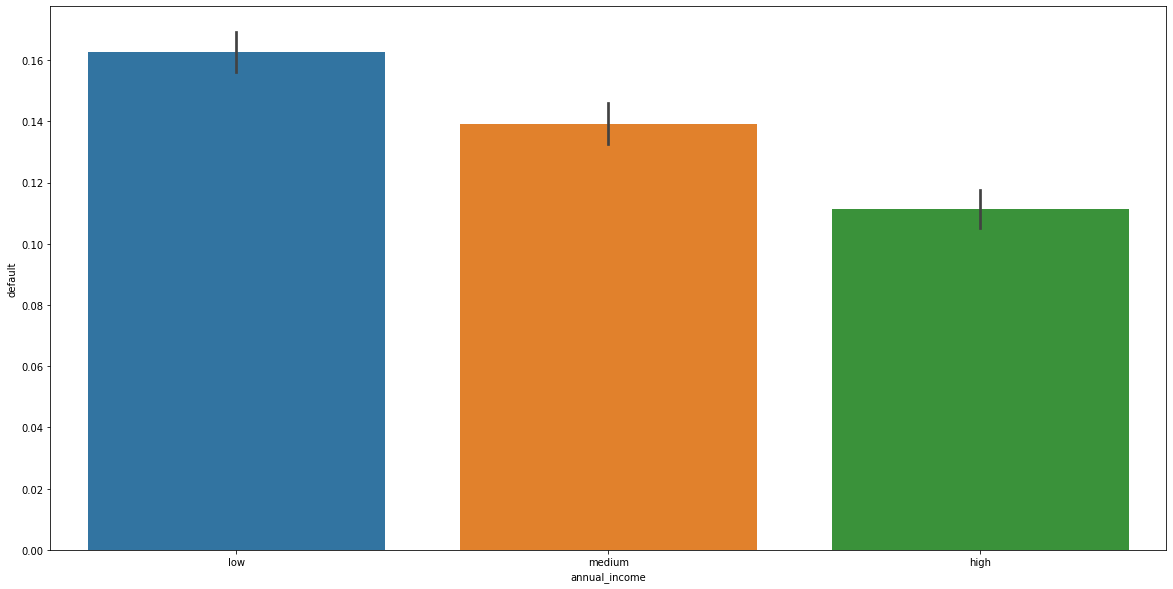

In [33]:
def annual_income(rate):
    if rate <= 50000:
        return "low"
    elif rate <= 75000:
        return "medium"
    else:
        return "high"
    
df_clean['annual_income'] = df_clean['annual_inc'].apply(annual_income)

#lets plot is over the graph
plt.figure(figsize=(20,10))
sns.barplot(x='annual_income', y='default', data=df_clean)
plt.show()

In [34]:
# As per the plot we see, income with low has more chances of default and high income has less chances of default.

df_clean.groupby(['annual_income'])['default'].sum() / df_clean.groupby(['annual_income'])['default'].count().sort_values()

annual_income
high      0.111433
low       0.162777
medium    0.139044
Name: default, dtype: float64

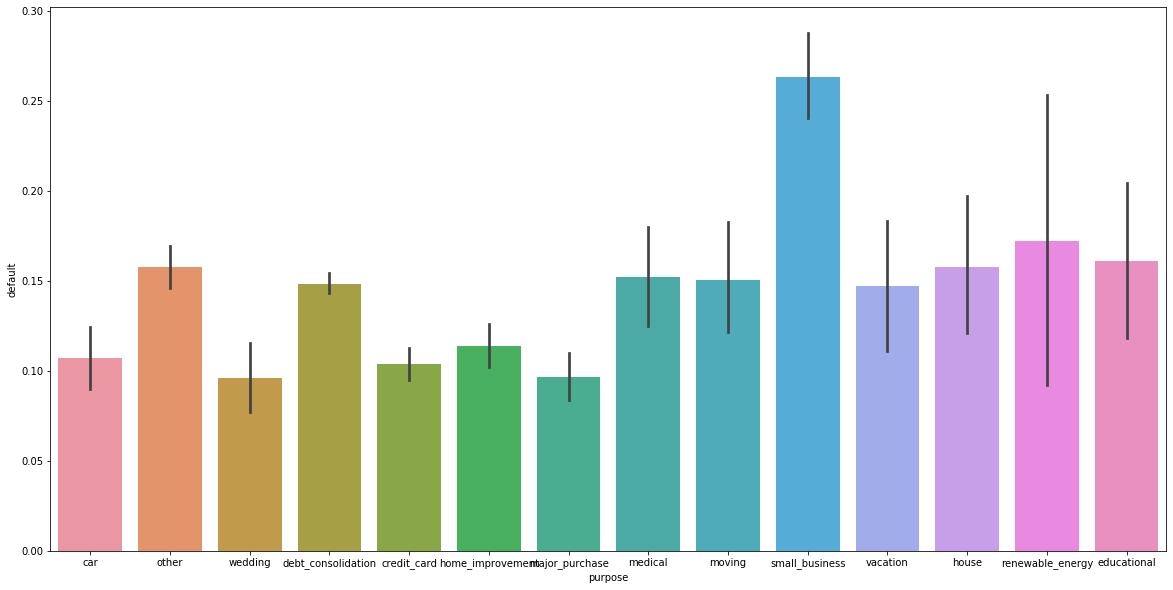

In [35]:
# graph of purpose/default count.
plt.figure(figsize=(20,10))
sns.barplot(x='purpose', y='default', data=df_clean)
plt.show()

In [36]:
# small bussiness purpose has chance of default. Lets look at the values for each purpose sorted
(df_clean.groupby(['purpose'])['default'].sum() / df_clean.groupby(['purpose'])['default'].count()).sort_values()

purpose
wedding               0.095843
major_purchase        0.096562
credit_card           0.103717
car                   0.107373
home_improvement      0.113871
vacation              0.147147
debt_consolidation    0.148514
moving                0.150476
medical               0.152488
house                 0.157576
other                 0.157789
educational           0.161290
renewable_energy      0.172414
small_business        0.263314
Name: default, dtype: float64

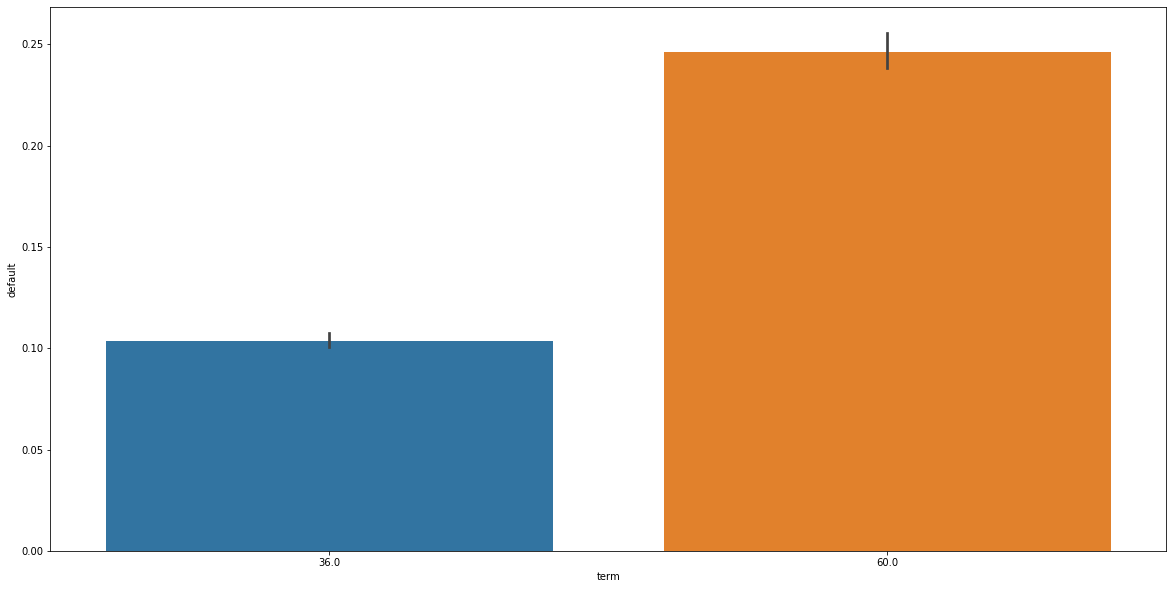

In [37]:
# graph of term/default count.
plt.figure(figsize=(20,10))
sns.barplot(x='term', y='default', data=df_clean)
plt.show()

60 months term has high chance of default

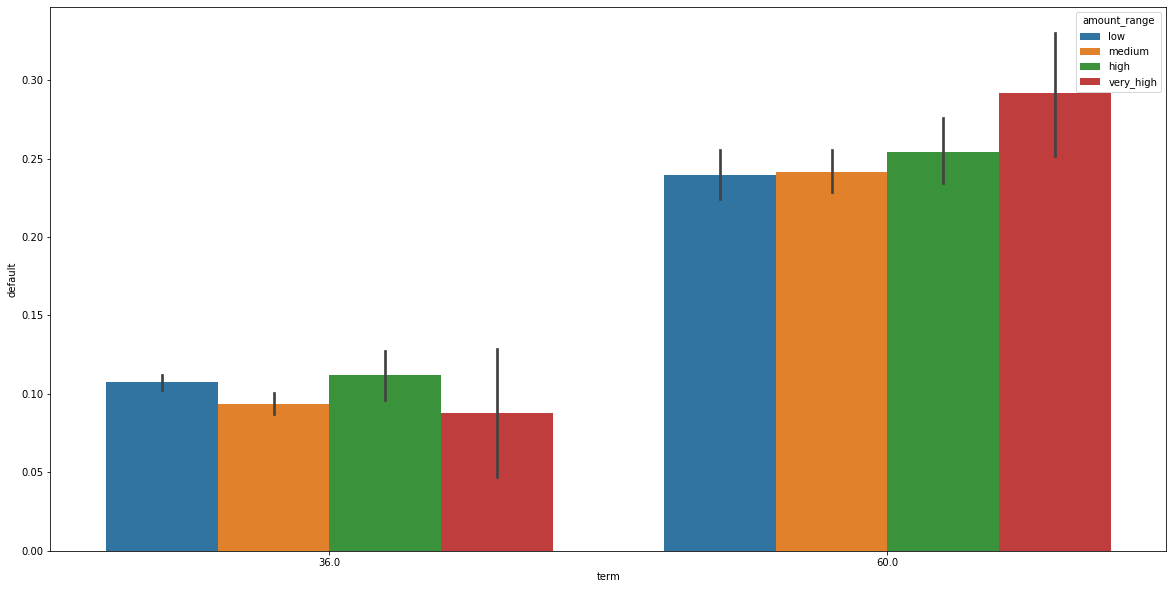

In [38]:
#lets take the amount_range of loans and plot them with term
plt.figure(figsize=[20, 10])
sns.barplot(x='term',hue='amount_range', y="default", data=df_clean)
plt.show()

 As per the plot we see, for sort term high range has more chances of default but for long term very_high range has more chances of default.

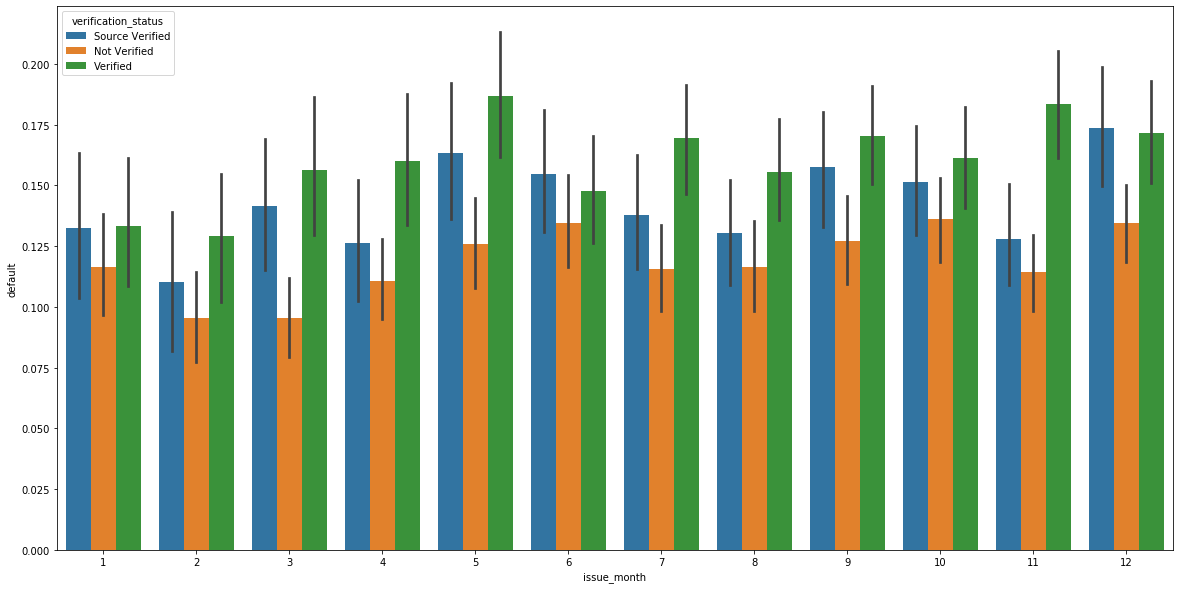

In [39]:
#Lets look into the verification status with issued month - chances of default
plt.figure(figsize=[20, 10])
sns.barplot(x='issue_month',hue='verification_status', y='default', data=df_clean)
plt.show()

As per the plot we see, loan verified on may has more chances of default.

In [40]:
# analysis based on installment
df_clean.installment.describe()

count    35409.000000
mean       323.854358
std        207.142834
min         16.080000
25%        167.730000
50%        280.260000
75%        426.470000
max       1305.190000
Name: installment, dtype: float64

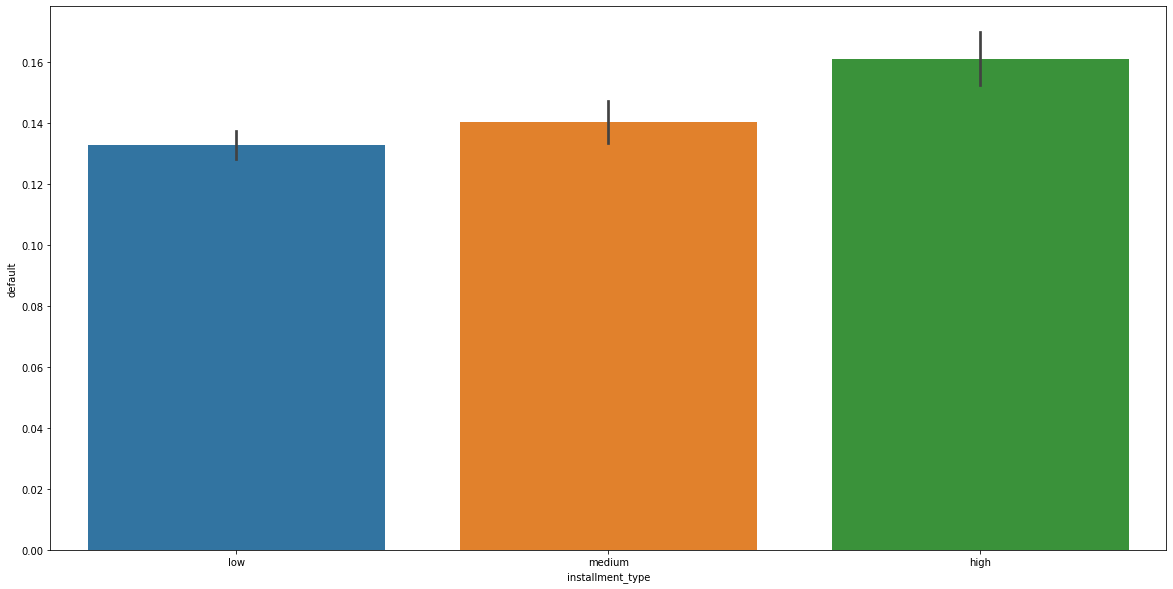

In [41]:
#as per the mean, 75% values, we will consider 300 as low and between 300 to 500 as medium and above 500 as high
def installment_type(rate):
    if rate <= 300:
        return "low"
    elif rate <= 500:
        return "medium"
    else:
        return "high"
    
df_clean['installment_type'] = df_clean['installment'].apply(installment_type)

#lets plot is over the graph
plt.figure(figsize=[20, 10])
sns.barplot(x='installment_type', y='default', data=df_clean)
plt.show()

As per the plot we see, installment haveing more than 500 has more chances of default.

In [42]:
df_clean.emp_length.describe()

count    35409.000000
mean         5.094072
std          3.389081
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

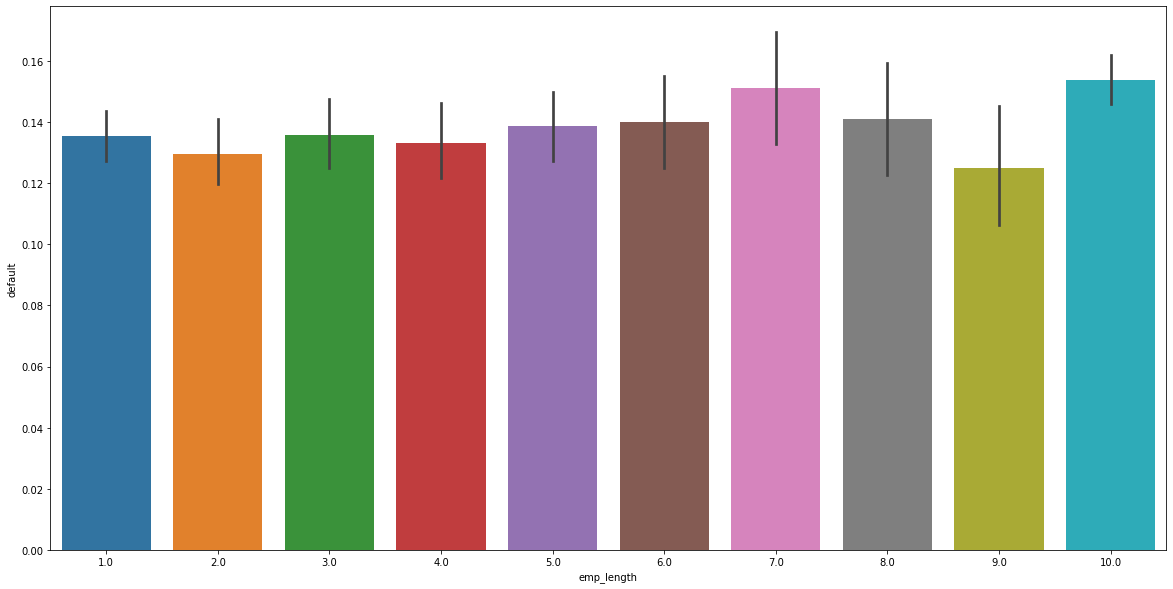

In [43]:
#lets plot is over the graph
plt.figure(figsize=[20, 10])
sns.barplot(x='emp_length', y='default', data=df_clean)
plt.show()

In [44]:
#As per the plot we see, employee who are 10 or 10+ experience has more chances of default.
(df_clean.groupby(['emp_length'])['default'].sum() / df_clean.groupby(['emp_length'])['default'].count()).sort_values()

emp_length
9.0     0.125000
2.0     0.129648
4.0     0.133250
1.0     0.135520
3.0     0.135783
5.0     0.138825
6.0     0.139952
8.0     0.140866
7.0     0.151127
10.0    0.153693
Name: default, dtype: float64

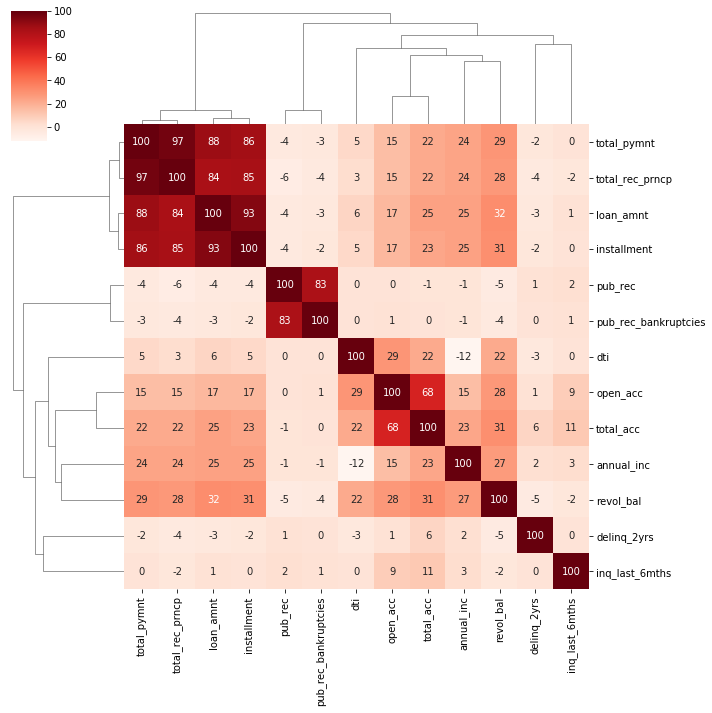

In [45]:
corr = df_clean[ ['loan_amnt','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','pub_rec_bankruptcies','revol_bal','total_acc','total_pymnt',
'total_rec_prncp']].corr().mul(100).astype(int)
sns.clustermap(data=corr, annot=True, fmt='d', cmap='Reds').savefig('cluster.png')

As per the above correlation we see that customer who has derogatory public records or public record bankruptcies has a very less chance of repaying the loan amount. Leading them to be a defaulter, So avoiding giving loan to these applicants would decrease the risk of defaulters.

